<a href="https://colab.research.google.com/github/faiz-ali-chishti/deep-learning-using-tensorflow-keras/blob/main/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Small Image Classification Using Convolutional Neural Network (CNN)**
### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Let's plot some images to see what they are

In [7]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

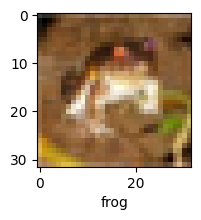

In [8]:
plot_sample(X_train, y_train, 0)

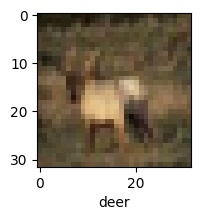

In [9]:
plot_sample(X_train, y_train, 3)

### **Normalizing the training data**

In [10]:
X_train = X_train / 255
X_test = X_test / 255

### **Build simple artificial neural network for image classification**

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3052 - loss: 1.9282
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4192 - loss: 1.6402
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4480 - loss: 1.5527
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4749 - loss: 1.4878
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4873 - loss: 1.4442


### You can see that at the end of 5 epochs, accuracy is at around 48%

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.66      0.55      1000
           1       0.65      0.51      0.57      1000
           2       0.34      0.37      0.36      1000
           3       0.36      0.34      0.35      1000
           4       0.54      0.18      0.27      1000
           5       0.53      0.22      0.31      1000
           6       0.65      0.38      0.48      1000
           7       0.31      0.78      0.45      1000
           8       0.77      0.38      0.51      1000
           9       0.46      0.67      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



### Now let us build a convolutional neural network to train our images

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3849 - loss: 1.6908
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6037 - loss: 1.1310
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6642 - loss: 0.9712
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6981 - loss: 0.8732
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7179 - loss: 0.8096
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7403 - loss: 0.7508
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7579 - loss: 0.6968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7758 - loss: 0.6484
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7860 - loss: 0.6106
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8013 - loss: 0.5738


In [16]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6975 - loss: 0.9112


[0.9172170758247375, 0.695900022983551]

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

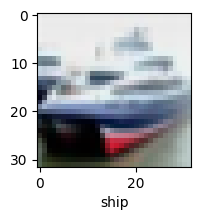

In [18]:
plot_sample(X_test, y_test, 1)

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[6.0214160e-04, 3.0471663e-05, 4.2857975e-04, 3.0186808e-01,
        2.2795464e-05, 2.8588034e-03, 1.0709253e-03, 1.5154288e-06,
        6.9311500e-01, 1.6808025e-06],
       [9.1569275e-03, 1.0305082e-01, 2.4487954e-06, 1.3895793e-06,
        1.1770645e-06, 1.8316656e-07, 3.3567567e-08, 8.4870653e-09,
        8.8499320e-01, 2.7938627e-03],
       [5.2389722e-02, 4.0918995e-02, 1.3900888e-02, 6.0457602e-02,
        1.1593137e-02, 1.2589693e-02, 1.6624338e-03, 3.0332733e-02,
        7.6113081e-01, 1.5024074e-02],
       [9.7990042e-01, 1.1735479e-04, 4.6446756e-03, 4.3183062e-03,
        1.2393222e-04, 9.7847435e-05, 1.6007916e-04, 9.2688424e-05,
        1.0532450e-02, 1.2166102e-05],
       [7.6458355e-06, 2.4949172e-06, 1.3066219e-03, 4.3990249e-03,
        1.2949450e-01, 2.6492390e-04, 8.6449713e-01, 5.7800603e-06,
        2.1412543e-05, 3.9782583e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(8), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

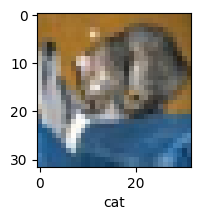

In [26]:
plot_sample(X_test, y_test, 0)

In [27]:
classes[y_classes[0]]

'ship'

In [28]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.87      0.77      0.82      1000
           2       0.58      0.60      0.59      1000
           3       0.47      0.59      0.52      1000
           4       0.68      0.61      0.64      1000
           5       0.62      0.60      0.61      1000
           6       0.82      0.75      0.78      1000
           7       0.73      0.76      0.74      1000
           8       0.75      0.82      0.78      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

